# Exercício 05
## Planejamento de Experimentos
### Alunos:

- Fernanda Tostes Marana (4471070)
- Matheus Aparecido do Carmo Alves (9791114)
- Thais Bianchini (9791010)


---


## Objetivos da prática:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.


---

## Funções novas utilizadas no exercício

- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)






---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---


Após a análise dos dados e um pré-processamento vem a etapa de modelagem dos experimentos. Essa etapa pode requerer voltar no pré-processamento caso perceba-se que algo precisa ser feito. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Essa prática foca mais no processo de avaliação.
Para a avaliação é preciso definir qual a função de custo/erro adequada, e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado á escolha do algoritmo de classificação bem como a escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

Dada a introdução acima, já definimos que o tipo do problema é classificação. Defina quais os atributos você utilizará, e a medida de avaliação você acha adequada e explique o porquê dessas escolhas. Você também deve fazer nessa questão os pré-processamentos que achar necessário.

Lembre-se que o objetivo da classificação é fazer predições para dados não vistos, ou seja, quando o algoritmo for colocado em produção ele classificará corretamente amostras não vistas.

**RESPOSTA:**

Primeiramente, iremos carregar o conjunto de dados "*breast cancer*", cujo os dados podem ser visualizados a seguir.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# 1. Carregando o conjunto de dados
breast_cancer = load_breast_cancer()

# 2. Extraindo os cabeçalhos
original_headers = list(breast_cancer.feature_names)
original_headers.append('class')

# 3. Imprimindo o conjunto de dados parcial
breast_cancer_df = pd.DataFrame(data= np.column_stack(\
            (np.array(breast_cancer.data),\
             np.array(breast_cancer.target))),\
            columns=original_headers)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Observando o dataset, nota-se que todos os dados são númericos e o problema se trata de um problema de classificação binário.

Frente a isso, iremos analisar a estratificação dos dados.

In [2]:
import matplotlib.pyplot as plt

# 1. Construindo um gráfico sobre a distribuição das classes
plt.bar([0,1],[list(breast_cancer.target).count(0),list(breast_cancer.target).count(1)],\
    color=['r','b'],align='center',tick_label=breast_cancer.target_names)
plt.show()

<Figure size 640x480 with 1 Axes>

O conjunto de dados apresenta uma distribuição desbalanceada dos dados entre as classes, possuindo mais exemplos da classe 1 ("*benign*") do que da classe 0 ("*malignant*"). Desta forma, é necessário que, durante o processo de treinamento, se utilize uma abordagem estratificada para generalização e validação do conhecimento.

Após a definição do método de validação e treino com o conjunto de dados, passaremos a uma análise sobre a relevância dos parâmetros.

O conjunto de dados "*breast cancer*" possui 30 parâmetros, dos quais alguns possívelmente podem ser descardados sem uma grande perda de informação. Para realizar está análise, aplicaremos o método de extração de componentes principais (PCA) de forma a definir os parâmetros que melhor representam o conjunto. Define-se que, nesta aplicação, aceitaremos uma perda de no máximo 10% da informação.

Contudo, antes da aplicação do PCA, será realizada uma normalização dos dados para uma extração mais precisa das componentes relevantes.

In [3]:
from sklearn.preprocessing import StandardScaler

# 1. Inicializando o algoritmo de normalização 
scaler = StandardScaler()

# 2. Normalizando os dados
breast_cancer_norm = scaler.fit_transform(breast_cancer.data)

Realizada a normalização, passaremos a aplicação do PCA.

In [4]:
from sklearn.decomposition import PCA

# 1. Inicializando o método PCA para extrair 90% da informação
pca = PCA(.9)

# 2. Extraindo os dados relevantes
breast_cancer_pca = pca.fit_transform(np.array(breast_cancer_norm))

# 3. Imprimindo os resultados
print('Número de componentes extraídos:', pca.n_components_)
print('Variância explicada:', pca.explained_variance_)

Número de componentes extraídos: 7
Variância explicada: [13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888]


Analisando os resultados, temos que,com a normalização e análise de componentes principais do conjunto de dados, é possível resolver o problema de classificação proposto utilizando 7 dos 30 parâmetros disponíveis, mantendo ainda 90% da informação original.

Acredita-se que esta redução de parâmetros e normalização contruibuirá para o aprendizado, uma vez que reduzirá a ambiguidade de certos exemplos e favorecerá a generalização do conhecimento, ao invés da memorização de exemplos.

O conjunto de dados final é definido no passo abaixo.

In [5]:
# Definindo o conjunto de dados a ser utilizado nos próximos exercícios
X, y = breast_cancer_pca, breast_cancer.target
headers = [original_headers[list(component).index(max(component))] for component in pca.components_]
headers.append('class')
data_df = pd.DataFrame(data= np.column_stack((np.array(X),np.array(y))),columns=headers)



---

### Questão 02.
Uma boa prática é escolher modelos mais simples, dados dois modelos com desempenho similar a escolha do mais simples é indicada pois com isso há algumas garantias de melhor generalização. Generalização, de maneira geral, é a propriedade que garante que o classificador terá desempenho parecido ao reportado no teste.

A definição da complexidade de um modelo nem sempre é uma tarefa fácil. Uma maneira de tentar mensurar isso é através do número de parâmetros do modelo, do tipo de função que ele implementa (linear ou não linear, cortes ortogonais no espaço, ...), ou da chamada dimensão VC (Vapnik-Chervonenkis) do classificador. A dimensão VC é um tópico mais avançado e faz parte da chamada teoria do aprendizado estatístico, ela é citada aqui apenas como curiosidade não é esperado que saibem sobre isso.

Execute a função *classificacao* definida no notebook com a medida de desempenho que você definiu. Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.

In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt


def classificacao(data, columns, target, score=balanced_accuracy_score, score_name='acurácia', 
                  folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    #Inicializa estruturas para matrizes de confusão 
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }

    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
            confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)        
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

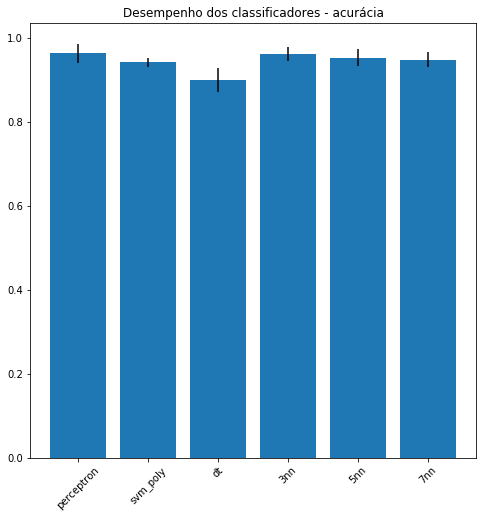

perceptron : 0.9636683616996816 0.02244575957361687
svm_poly : 0.9419223663112095 0.010585459648735054
dt : 0.9002012339288555 0.0288423613863043
3nn : 0.9616188378185282 0.016559009779102508
5nn : 0.953419732232704 0.02009249391795451
7nn : 0.948619188577102 0.018261942028560935


In [7]:
result = classificacao(data_df,np.arange(0,len(X[0])),len(X[0]))

for cls in result['results']:
    print(cls,':',np.mean(result['results'][cls]),np.array(result['results'][cls]).std())

**RESPOSTA:**

Os classificadores que apresentaram melhores desempenhos foram o *perceptron* e o *3nn*.
Não é possível dizer quais dos dois é significativamente melhor que outro, estatisticamente, uma vez que ambos ocupam um intervalo de confiana similar considerando média e desvio padrão.

Para confirmar esta afirmação, basta se realizar um teste-p e se analisar a similaridade entre os resultados.

---

### Questão 03.

Utilizar os 3 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;
- Boostrap (1000 amostras de boostrap).

Para o dataset escolhido, executar os 3 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Para o 10-fold Cross Validation e o leave-one-out, você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.
  * Já para o boostrap, você vai precisar implementar a função classificação modificada `classificacao_bootstrap`. A seção de interesse que vocês precisarão modificar está destacada na função. No cálculo do bootstrap utilize 80% do dataset para treino e 20% para teste.

Essas execuções podem demorar um pouco, então tenham paciência.

**No material complementar há exemplos de como fazer o bootstrap**

In [8]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt


def classificacao_bootstrap(data, columns, target, score=balanced_accuracy_score, no_bs=1000, p_teste=0.2, score_name='acurácia', plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    no_bs:      Número de repetições do bootstrap
    p_teste:    Porcentagem para teste da amostra do bootstrap
    score_name: String. Uma string com o nome da medida de desempenho    
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
      for i in range(0, no_bs):
        ################# IMPLEMENTE ABAIXO O BOOTSTRAP #######################
        #    Sua implementação deve fazer o append no vetor results da mesma 
        #    forma que a implementação original faz.
        #    Dentro desse loop:
        #     c: variável-objeto que representa o classificador
        #     c_name: Nome do classificador
        #     results: vetor de resultado
        #######################################################################



        #######################################################################
        
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

IndentationError: expected an indented block (<ipython-input-8-0f9340a90c3a>, line 75)



---

### Questão 04.

Utilizando o 10-fold cross validation, calcule as medidas de avaliação baseadas na matriz de confusão (TFP, TFN, TVN, TVP). Como em meio a tantas medidas de avaliação, comparar os classificadores? Como escolher o melhor?